In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
data=pd.read_csv('E:/0_1_Data Science and AI_Intellipaat/Assignments/000cap stone/Project/OnlineRetail.csv')

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


**We note that quantity and unit price are having negative values for min value. Lets investigate**

In [6]:
data[data['Quantity']<0]['InvoiceNo']

141       C536379
154       C536383
235       C536391
236       C536391
237       C536391
           ...   
540449    C581490
541541    C581499
541715    C581568
541716    C581569
541717    C581569
Name: InvoiceNo, Length: 10624, dtype: object

In [7]:
data[data['UnitPrice']<0]['InvoiceNo']

299983    A563186
299984    A563187
Name: InvoiceNo, dtype: object

In [8]:
data.query('InvoiceNo=="A563186" or InvoiceNo=="A563187"')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


**We note that Invoice No starting with 'C' are all cancelled products and hence we will not require them in the analysis**

In [9]:
data.shape

(541909, 8)

In [10]:
data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

**Which products are popular among customers?**

In [11]:
data.groupby('Description')['CustomerID'].count().sort_values(ascending=False)[:30]

Description
WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
LUNCH BAG RED RETROSPOT               1358
SET OF 3 CAKE TINS PANTRY DESIGN      1232
POSTAGE                               1196
LUNCH BAG  BLACK SKULL.               1126
PACK OF 72 RETROSPOT CAKE CASES       1080
PAPER CHAIN KIT 50'S CHRISTMAS        1029
SPOTTY BUNTING                        1029
LUNCH BAG SPACEBOY DESIGN             1021
LUNCH BAG CARS BLUE                   1012
NATURAL SLATE HEART CHALKBOARD         997
HEART OF WICKER SMALL                  996
LUNCH BAG PINK POLKADOT                977
JAM MAKING SET WITH JARS               974
REX CASH+CARRY JUMBO SHOPPER           955
LUNCH BAG SUKI DESIGN                  950
ALARM CLOCK BAKELIKE RED               932
LUNCH BAG APPLE DESIGN                 907
WOODEN PICTURE FRAME WHITE FINISH      905

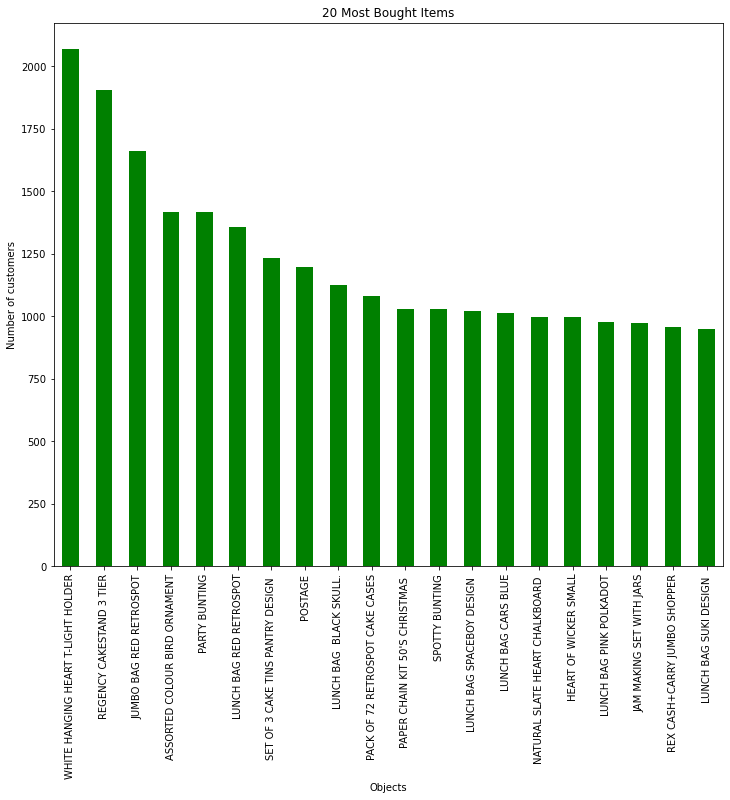

In [12]:
plt.figure(figsize=(12,10))
data.groupby('Description')['CustomerID'].count().sort_values(ascending=False)[:20].plot(kind='bar',sort_columns=True,
                                                                                         title='20 Most Bought Items',
                                                                                         xlabel='Objects',
                                                                                         ylabel='Number of customers',
                                                                                         colormap='ocean')
plt.show()

**Top customers who purchased for high amounts**

In [13]:
data['Amount']=data['UnitPrice']*data['Quantity']


In [14]:
pd.DataFrame(data.groupby('CustomerID')['Amount'].sum().sort_values(ascending=False)).iloc[:20]

,Amount
CustomerID,
14646.0,279489.02
18102.0,256438.49
17450.0,187482.17
14911.0,132572.62
12415.0,123725.45
14156.0,113384.14
17511.0,88125.38
16684.0,65892.08
13694.0,62653.10


<Figure size 864x720 with 0 Axes>

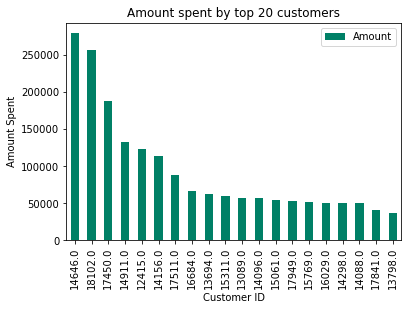

In [15]:
plt.figure(figsize=(12,10))
pd.DataFrame(data.groupby('CustomerID')['Amount'].sum().sort_values(ascending=False)).iloc[:20].plot(kind='bar',
                                                                                                     ylabel='Amount Spent',
                                                                                                     colormap='summer',
                                                                                                     xlabel='Customer ID',
                                                                                  title='Amount spent by top 20 customers')
plt.show()                                                                                 

**When has the maximum transaction taken place**

In [16]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   Amount       541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.2+ MB


In [17]:
data['day']=data['InvoiceDate'].dt.day
data['year']=data['InvoiceDate'].dt.year
data['month']=data['InvoiceDate'].dt.month
data['hours']=data['InvoiceDate'].dt.hour

In [18]:
data['duration']=pd.cut(data['hours'],bins=[1,11,16,19,23],labels=['Morning','Afternoon','Evening','Night'])

In [19]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,day,year,month,hours,duration
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,1,2010,12,8,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,2010,12,8,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,1,2010,12,8,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,2010,12,8,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,2010,12,8,Morning


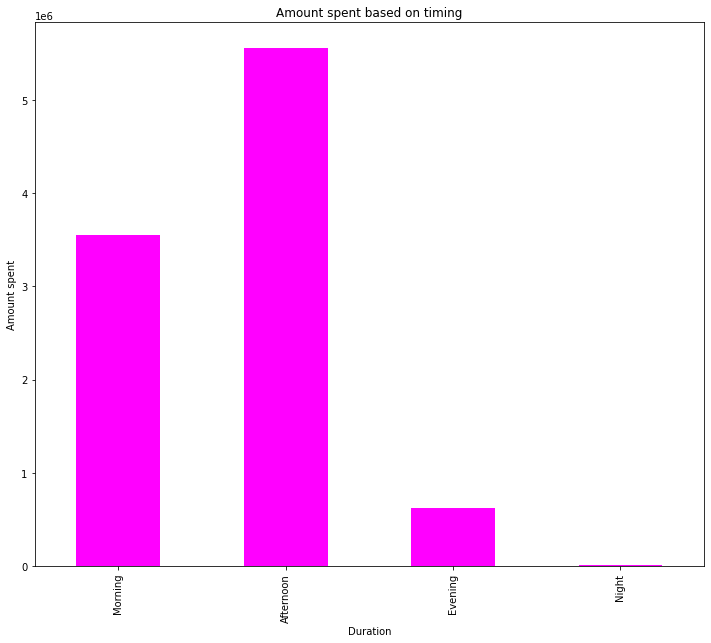

In [20]:
plt.figure(figsize=(12,10))
data.groupby('duration')['Amount'].sum().plot(kind='bar',sort_columns=True,xlabel='Duration',ylabel='Amount spent',title='Amount spent based on timing',colormap='spring')
plt.show()

Maximum sales have happened during 11 - 16 hours (during afternoon hours)

<AxesSubplot:title={'center':'Amount spent based on month'}, xlabel='Month', ylabel='Amount spent'>

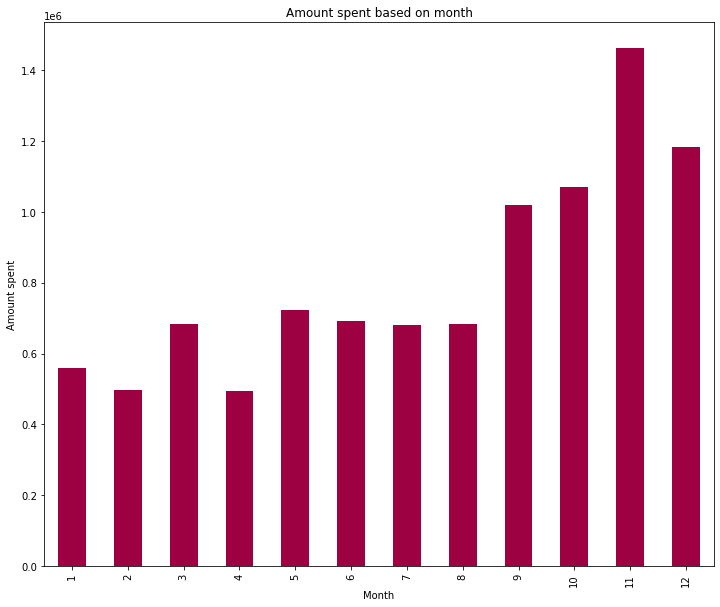

In [21]:
plt.figure(figsize=(12,10))
data.groupby('month')['Amount'].sum().plot(kind='bar',xlabel='Month',ylabel='Amount spent',title='Amount spent based on month',colormap='Spectral')

November month has seen very high sales than any other month

**Which countries have contributed high towars sales**

<AxesSubplot:title={'center':'Distribution of money based on countries'}, xlabel='Countries', ylabel='Amount spent'>

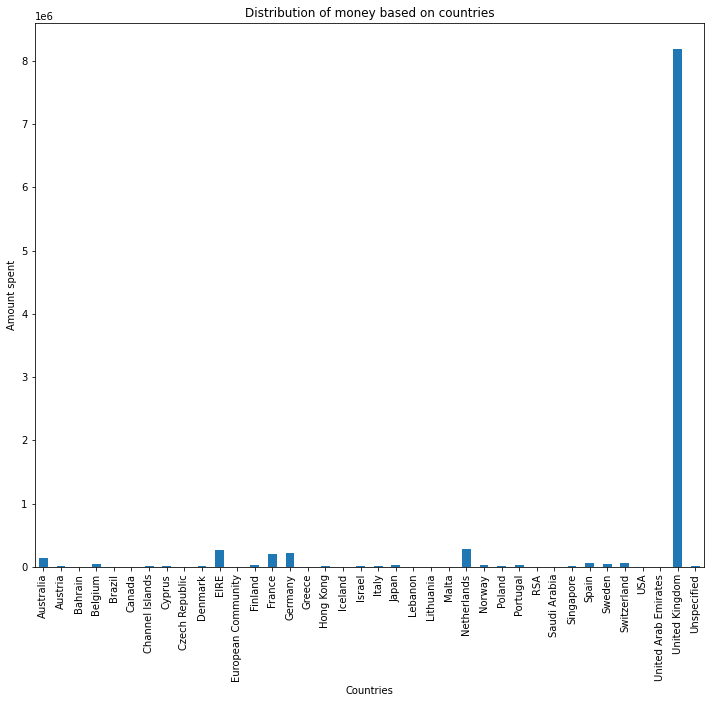

In [23]:
plt.figure(figsize=(12,10))
data.groupby('Country')['Amount'].sum().plot(kind='bar',xlabel='Countries',ylabel='Amount spent',title='Distribution of money based on countries')

UK is seen to have the highest sales 